In [1]:
import pickle

pickle.load(open("outputs/results/dino_24.pkl", "rb"))

[{'batch_input_shape': (800, 1200),
  'img_id': 0,
  'img_shape': (800, 1200),
  'ori_shape': (2592, 3888),
  'scale_factor': (0.30864197530864196, 0.30864197530864196),
  'pad_shape': (800, 1200),
  'img_path': 'data/aircraft/dataset/f0055552c8a0538a76b175765f443b97.jpg',
  'pred_instances': {'labels': tensor([60, 31, 29, 28, 57, 27, 38, 23, 65, 25, 54, 30, 74, 52,  9, 10, 13, 14,
           20, 16, 32, 61, 26, 71, 24, 62, 35, 55, 47, 66,  0,  4, 36, 53, 80, 69,
           12, 40, 58, 49,  1, 59,  3, 15, 70, 43,  5, 72, 67, 41, 19,  2, 39, 18,
           51, 37, 21, 48,  7, 75, 42, 79, 17, 33, 78, 57, 50, 29, 46, 31, 68, 22,
            8, 29, 77, 28, 28, 56, 28, 60, 25, 54, 31, 64, 27, 57, 76,  9, 34, 45,
           35,  6, 30, 38, 31, 42, 29, 31, 73, 54, 20, 28, 28, 80, 71, 29, 11,  4,
           52, 31, 72, 57, 62, 54, 14, 23, 27, 35, 30, 65,  0, 54, 60, 19, 15, 25,
           27, 29, 38, 35, 30, 57, 31,  3, 15, 28, 32,  9, 65, 27, 70,  4, 61, 16,
           29, 20, 71, 23, 27, 24,

In [1]:
import json
import matplotlib.pyplot as plt


def plot_mAP(log_files):
    epochs = []
    mAPs = []

    for file_path in log_files:
        with open(file_path, "r") as f:
            for line in f:
                try:
                    data = json.loads(line)
                    if "coco/bbox_mAP" in data:
                        epoch = data.get("epoch", data.get("step", None))
                        mAP = data["coco/bbox_mAP"]
                        if epoch is not None:
                            epochs.append(epoch)
                            mAPs.append(mAP)
                except json.JSONDecodeError:
                    continue  # skip malformed lines

    # Sort by epoch just in case
    combined = sorted(zip(epochs, mAPs), key=lambda x: x[0])
    epochs, mAPs = zip(*combined)

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(epochs, mAPs, marker="o", label="bbox_mAP")
    plt.title("Validation mAP across Multiple Training Runs")
    plt.xlabel("Epoch")
    plt.ylabel("coco/bbox_mAP")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()





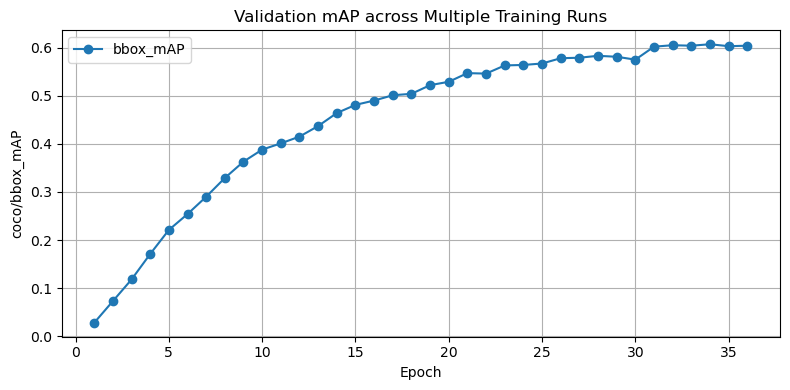

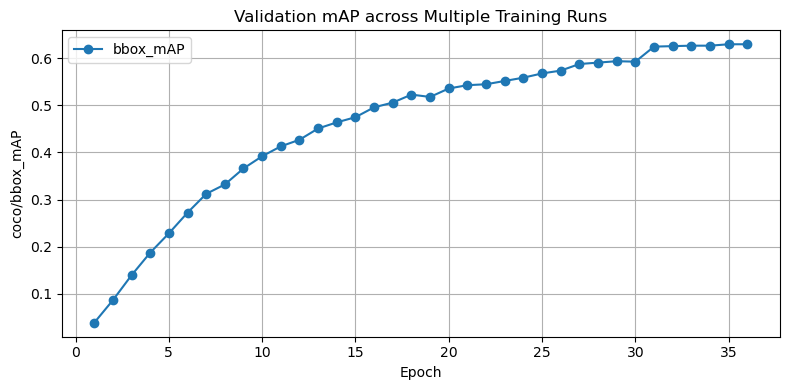

In [2]:
# Call the function to plot mAP
log_files = [
    "work_dirs/dino-4scale_r50_improved_8xb2/20250405_112939/vis_data/scalars.json"
]
plot_mAP(log_files)

log_files = [
    "work_dirs/frozen-4scale_r50_improved_8xb2/20250407_074619/vis_data/scalars.json",
    "work_dirs/frozen-4scale_r50_improved_8xb2/20250407_200116/vis_data/scalars.json"
]
plot_mAP(log_files)


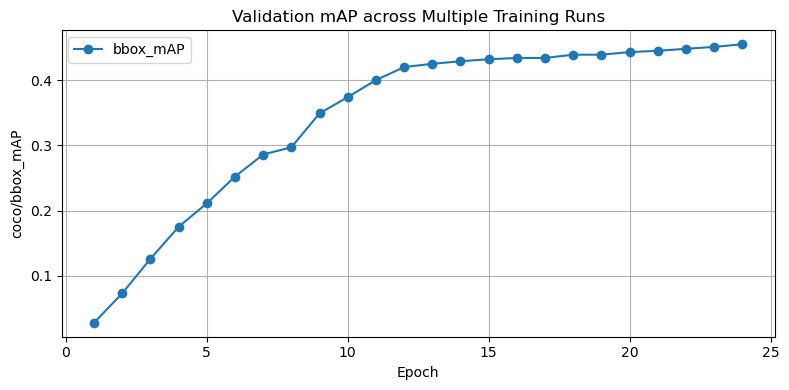

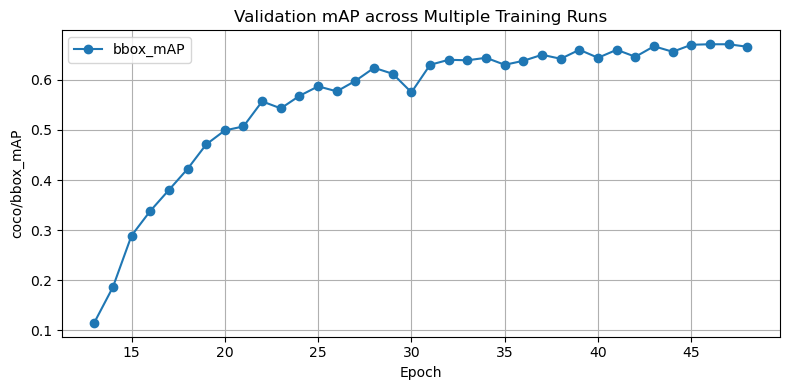

In [3]:
log_files = [
    "work_dirs/dino-4scale_r50_improved_8xb2/20250404_122915/vis_data/scalars.json",
    "work_dirs/dino-4scale_r50_improved_8xb2/20250404_235356/vis_data/scalars.json",
]
plot_mAP(log_files)

log_files = [
    "work_dirs/frozen_dino/20250403_162717/vis_data/scalars.json",
    "work_dirs/frozen_dino/20250403_090055/vis_data/scalars.json"
]
plot_mAP(log_files)
